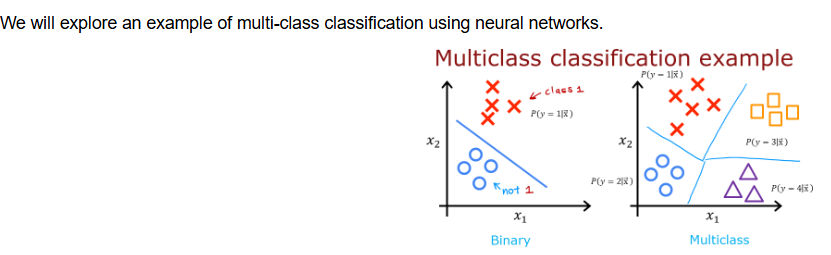

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

##  Prepare and visualize our data
We will use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.

In [4]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples = m, cluster_std = std, centers = centers, random_state = 30)

In [5]:

def plt_mc(X, y, classes, centers, std):
    colors = ['blue', 'orange', 'green', 'purple']
    labels = [f'c{i}' for i in range(classes)]

    for i in range(classes):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=labels[i])

    plt.title("Multiclass Data")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.legend()
    plt.grid(True)
    plt.show()


📊 plt_mc() Function - Explanation
The plt_mc() function is a custom visualization tool that:

Plots a 2D scatter plot of synthetic classification data.

Colors each data point based on its class label (0 to 3).

Adds a legend, axis labels, and title for clarity.

Helps visualize how well-separated the generated classes are.

It is useful for understanding the structure of multi-class datasets created using make_blobs.

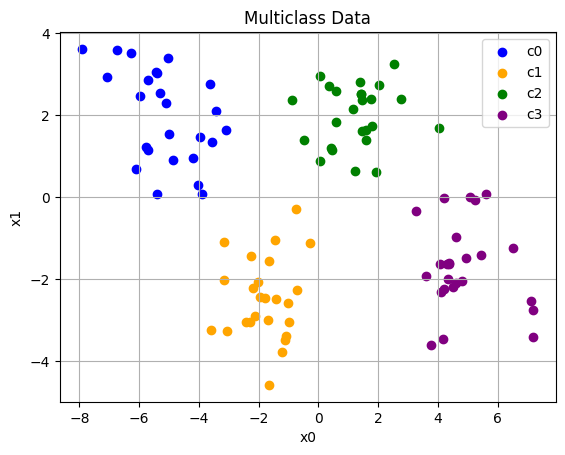

In [7]:
plt_mc(X_train, y_train, classes, centers, std)

In [8]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## Model
We will use a 2-layer network as shown.
Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.   

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a `linear` rather than a `softmax` activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [11]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential([
    Dense(2, activation = 'relu', name = 'L1'),
    Dense(4, activation = 'linear', name = 'L2')

])

The statements below compile and train the network. Setting `from_logits=True` as an argument to the loss function specifies that the output activation was linear rather than a softmax.

In [13]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0372  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0301 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0257 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0234 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0216 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0199 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192 
Epoch 16/200
4/4 ━

In [17]:
def plt_cat_mc(X, y, model, num_classes):
    # Create a mesh grid around the data
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    # Flatten the grid to pass into the model
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = np.argmax(preds, axis=1)
    preds = preds.reshape(xx.shape)

    # Plot the decision boundaries
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.Set1)

    # Plot the training points
    for i in range(num_classes):
        plt.scatter(X[y == i, 0], X[y == i, 1], label=f'c{i}')
    
    plt.title("Model Decision Boundary")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.legend()
    plt.show()


The function plt_cat_mc(X_train, y_train, model, classes) is a custom visualization used to plot:

The data points (X_train, y_train)

The decision boundaries of a trained model (model)

With support for multiple classes (classes)

With the model trained, we can see how the model has classified the training data.

2191/2191 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step


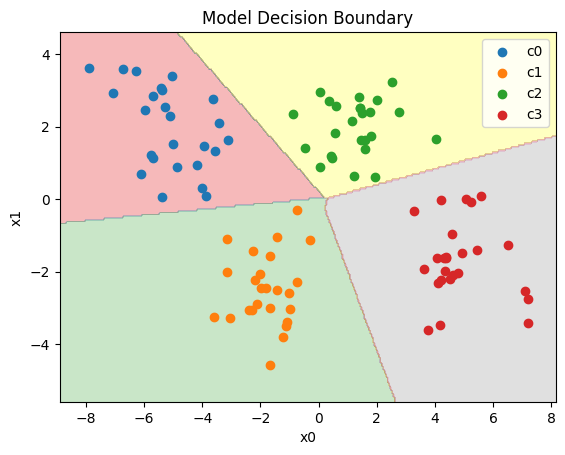

In [18]:
plt_cat_mc(X_train, y_train, model, classes)

We build and operate a neural network for multiclass classification. LESSGO!
